In [11]:
from matplotlib import pyplot as plt
import matplotlib
import DND_Functions as dndf
import numpy as np
from collections import Counter
from collections import OrderedDict
from cycler import cycler
from imp import reload

%matplotlib inline

In [14]:
reload(dndf)

<module 'DND_Functions' from '/Users/Darien/Google Drive/Documents/Home Projects/Programming Projects/DND MonteCarlo/DND_Functions.py'>

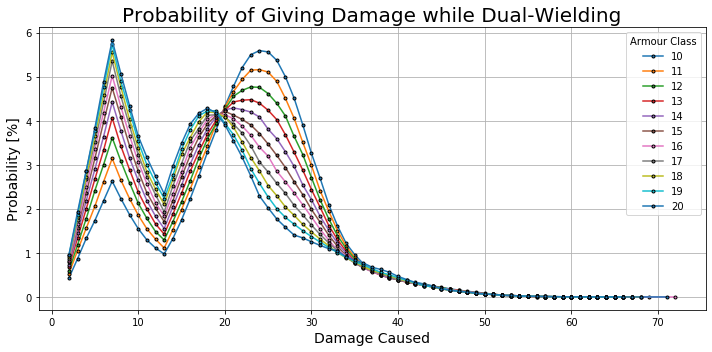

In [2]:
n = 1e6
acs = np.arange(10, 21, 1)

actions_sword1 = OrderedDict()
actions_sword1['hit'] = 5
actions_sword1['shortsword'] = '1d6'
actions_sword1['prof'] = 3
actions_sword1['sneak_attack'] = '1d6'
actions_sword1['hunters_mark'] = '1d6'
actions_sword1['colossus_slayer'] = '1d8'

actions_sword2 = {}
actions_sword2['hit'] = 5
actions_sword2['shortsword'] = '1d6'
actions_sword2['prof'] = 0
actions_sword2['hunters_mark'] = '1d6'

actions_list = [actions_sword1, actions_sword2]

plt.figure(figsize=(10,5), facecolor='white')

dndf.PlotAcDistribution(actions_list, acs, n, ignore_miss=True)

plt.xlabel('Damage Caused', fontsize=14)
plt.ylabel('Probability [%]', fontsize=14)
plt.title('Probability of Giving Damage while Dual-Wielding', fontsize=20)
plt.legend(loc='best', title='Armour Class')
plt.grid(True)
plt.tight_layout()

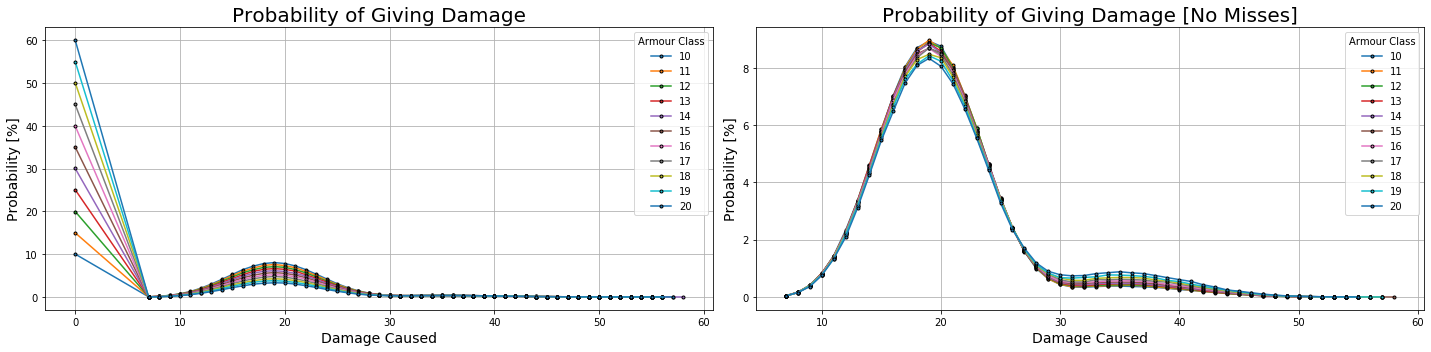

In [17]:
n = 1e6
acs = np.arange(10, 21, 1)

actions_bow = {}
actions_bow['hit'] = 7
actions_bow['longbow'] = '1d8'
actions_bow['prof'] = 3
actions_bow['sneak_attack'] = '1d6'
actions_bow['hunters_mark'] = '1d6'
actions_bow['colossus_slayer'] = '1d8'

fig= plt.figure(figsize=(20, 5), facecolor='white')

plt.subplot(1,2,1)

dndf.PlotAcDistribution(actions_bow, acs, n, ignore_miss=False)

plt.xlabel('Damage Caused', fontsize=14)
plt.ylabel('Probability [%]', fontsize=14)
plt.title('Probability of Giving Damage', fontsize=20)
plt.legend(loc='best', title='Armour Class')
plt.grid(True)


plt.subplot(1,2,2)

dndf.PlotAcDistribution(actions_bow, acs, n, ignore_miss=True)

plt.xlabel('Damage Caused', fontsize=14)
plt.ylabel('Probability [%]', fontsize=14)
plt.title('Probability of Giving Damage [No Misses]', fontsize=20)
plt.legend(loc='best', title='Armour Class')
plt.grid(True)

plt.tight_layout()

12.206523 13.620354
11.013681457644894 11.543219088048357


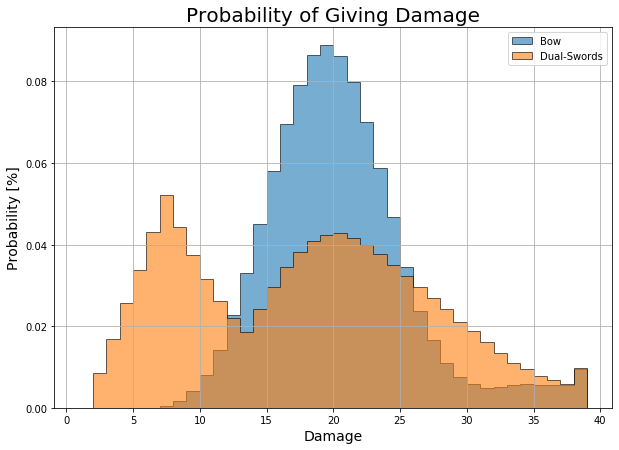

In [4]:
n = 1e6
AC = 16
label = ['Bow', 'Dual-Swords']

fig = plt.figure(figsize=(10, 7), facecolor='white')

actions = OrderedDict()
actions['hit'] = 7
actions['longbow'] = '1d8'
actions['prof'] = 3
actions['sneak_attack'] = '1d6'
actions['hunters_mark'] = '1d6'
actions['colossus_slayer'] = '1d8'

final_vals1 = dndf.MonteCarloAttack(actions, AC, n=n)

actions = OrderedDict()
actions['hit'] = 5
actions['shortsword'] = '1d6'
actions['prof'] = 3
actions['sneak_attack'] = '1d6'
actions['hunters_mark'] = '1d6'
actions['colossus_slayer'] = '1d8'

final_vals2 = dndf.MonteCarloAttack(actions, AC, n=n)

actions = OrderedDict()
actions['hit'] = 5
actions['shortsword'] = '1d6'
actions['prof'] = 0
actions['hunters_mark'] = '1d6'

final_vals3 = dndf.MonteCarloAttack(actions, AC, n=n)
final_vals2 = final_vals2 + final_vals3

bins = np.arange(1, 40, 1)

# plt.subplot(2,1,1)
plt.hist(final_vals1, bins=bins, edgecolor='k', alpha=0.6, label=label[0], density=True, histtype='stepfilled')
plt.hist(final_vals2, bins=bins, edgecolor='k', alpha=0.6, label=label[1], density=True, histtype='stepfilled')
plt.grid(True)
plt.xlabel('Damage', fontsize=14)
plt.ylabel('Probability [%]', fontsize=14)
plt.title('Probability of Giving Damage', fontsize=20)
plt.legend(loc='best')

print(np.mean(final_vals1), np.mean(final_vals2))
print(np.std(final_vals1), np.std(final_vals2))

In [ ]:
fig.savefig('test.png', dps=200)